In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
test_1 = pd.read_csv("../data/perimeter_fixed/perimeter_fixed_test_1.csv")
test_2 = pd.read_csv("../data/perimeter_fixed/perimeter_fixed_test_2.csv")

In [4]:
df = test_1.copy()

In [5]:
df.shape

(300, 22)

In [6]:
df.describe()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,...,p_mkcat,p_mKm,Kinase in Solution,Phosphatase in Solution,Average Body X,Average Node 1 X,Average Node 2 X,Average Node 3 X,Average Node 4 X,Average All Nodes X
count,300.000000,300.000000,300.00,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,303.060978,206.807327,0.01,0.5,1.956094,0.237731,0.011175,0.068737,0.058508,0.012453,...,14.990871,0.570722,304.450000,125.843333,2.884653e-02,3.940669e-02,1.621419e-02,2.404963e-02,3.616051e-02,2.895687e-02
std,141.656008,141.642791,0.00,0.0,0.516397,0.092900,0.003944,0.020502,0.021952,0.004002,...,5.212124,0.222688,141.696626,153.693258,2.586191e-02,5.511055e-02,2.516493e-02,6.220926e-02,3.911432e-02,4.087252e-02
min,72.711365,11.380982,0.01,0.5,1.280495,0.106785,0.005330,0.034778,0.028867,0.005237,...,8.894224,0.264137,58.000000,0.000000,2.190811e-117,7.190832e-119,1.202248e-146,1.456298e-148,5.331714e-130,1.797708e-119
25%,171.323476,86.222857,0.01,0.5,1.337169,0.146350,0.008268,0.045849,0.036698,0.011782,...,10.622537,0.387485,176.750000,34.000000,1.708402e-02,1.257394e-02,2.375219e-04,7.149319e-04,1.136771e-02,1.184815e-02
50%,309.541533,163.465136,0.01,0.5,1.981194,0.227690,0.010620,0.076541,0.056726,0.012314,...,13.583213,0.561009,312.500000,85.000000,2.239665e-02,2.488196e-02,7.029585e-03,9.324688e-03,2.607073e-02,1.867181e-02
75%,446.016060,326.709829,0.01,0.5,2.448888,0.297293,0.015833,0.087984,0.066642,0.014597,...,19.503912,0.748312,452.000000,150.250000,2.858920e-02,4.110054e-02,1.851060e-02,2.202415e-02,4.269942e-02,2.691021e-02
max,476.409202,455.606576,0.01,0.5,2.698255,0.388635,0.017175,0.091573,0.097466,0.019193,...,25.174035,0.972019,516.000000,733.000000,1.644911e-01,2.908514e-01,1.541356e-01,5.122265e-01,2.200934e-01,2.714147e-01


In [9]:
sorted_df = df.sort_values(by='Total Kinase')

In [10]:
num_reps = sorted_df['Total Kinase'].value_counts().tolist()[0]
num_reps

30

In [11]:
num_runs = sorted_df['Total Kinase'].value_counts().shape[0]
num_runs

10

In [12]:
runs_ls = []
for i in range(num_runs):
    runs_ls.append(sorted_df.iloc[i:i + num_reps, :])
runs_ls[0].head()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,...,p_mkcat,p_mKm,Kinase in Solution,Phosphatase in Solution,Average Body X,Average Node 1 X,Average Node 2 X,Average Node 3 X,Average Node 4 X,Average All Nodes X
141,72.711365,54.676925,0.01,0.5,2.414322,0.195176,0.016522,0.091573,0.054136,0.014597,...,16.413844,0.387485,82,37,0.026367,0.035331,0.012145,0.010363,0.005476,0.015831
32,72.711365,54.676925,0.01,0.5,2.414322,0.195176,0.016522,0.091573,0.054136,0.014597,...,16.413844,0.387485,77,17,0.040907,0.039986,0.030591,0.055291,0.075202,0.050576
33,72.711365,54.676925,0.01,0.5,2.414322,0.195176,0.016522,0.091573,0.054136,0.014597,...,16.413844,0.387485,74,16,0.043151,0.010737,0.011859,0.010526,0.037241,0.017634
122,72.711365,54.676925,0.01,0.5,2.414322,0.195176,0.016522,0.091573,0.054136,0.014597,...,16.413844,0.387485,70,34,0.026706,0.011473,0.038180,0.001333,0.006958,0.013859
42,72.711365,54.676925,0.01,0.5,2.414322,0.195176,0.016522,0.091573,0.054136,0.014597,...,16.413844,0.387485,76,28,0.026733,0.025940,0.011159,0.030278,0.100994,0.042627


In [13]:
results_ls = []
for r in runs_ls:
    for i in range(1, 5):
        r['Polarization Index ' + str(i)] = (r['Average Node ' + str(i) + ' X'] / r['Average Body X'])
        r['Node ' + str(i) + ' is Polarized'] = r['Polarization Index ' + str(i)] > 1.5

    node_cols = [f'Node {i} is Polarized' for i in range(1, 5)]
    r['Number of Polarized Nodes'] = r[node_cols].sum(axis=1)
    results_ls.append(r.iloc[:, 14:])

results_ls[0].head()

/var/folders/9n/gs5b8kf11vsdrjkdzp9gqkcm0000gn/T/ipykernel_68183/1948890441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Polarization Index ' + str(i)] = (r['Average Node ' + str(i) + ' X'] / r['Average Body X'])
/var/folders/9n/gs5b8kf11vsdrjkdzp9gqkcm0000gn/T/ipykernel_68183/1948890441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Node ' + str(i) + ' is Polarized'] = r['Polarization Index ' + str(i)] > 1.5
/var/folders/9n/gs5b8kf11vsdrjkdzp9gqkcm0000gn/T/ipykernel_68183/1948890441.py:4:

,Kinase in Solution,Phosphatase in Solution,Average Body X,Average Node 1 X,Average Node 2 X,Average Node 3 X,Average Node 4 X,Average All Nodes X,Polarization Index 1,Node 1 is Polarized,Polarization Index 2,Node 2 is Polarized,Polarization Index 3,Node 3 is Polarized,Polarization Index 4,Node 4 is Polarized,Number of Polarized Nodes
141,82,37,0.026367,0.035331,0.012145,0.010363,0.005476,0.015831,1.339941,False,0.460592,False,0.393025,False,0.207682,False,0
32,77,17,0.040907,0.039986,0.030591,0.055291,0.075202,0.050576,0.977468,False,0.747819,False,1.351618,False,1.838341,True,1
33,74,16,0.043151,0.010737,0.011859,0.010526,0.037241,0.017634,0.248832,False,0.274820,False,0.243937,False,0.863053,False,0
122,70,34,0.026706,0.011473,0.038180,0.001333,0.006958,0.013859,0.429603,False,1.429645,False,0.049903,False,0.260527,False,0
42,76,28,0.026733,0.025940,0.011159,0.030278,0.100994,0.042627,0.970307,False,0.417420,False,1.132590,False,3.777801,True,1


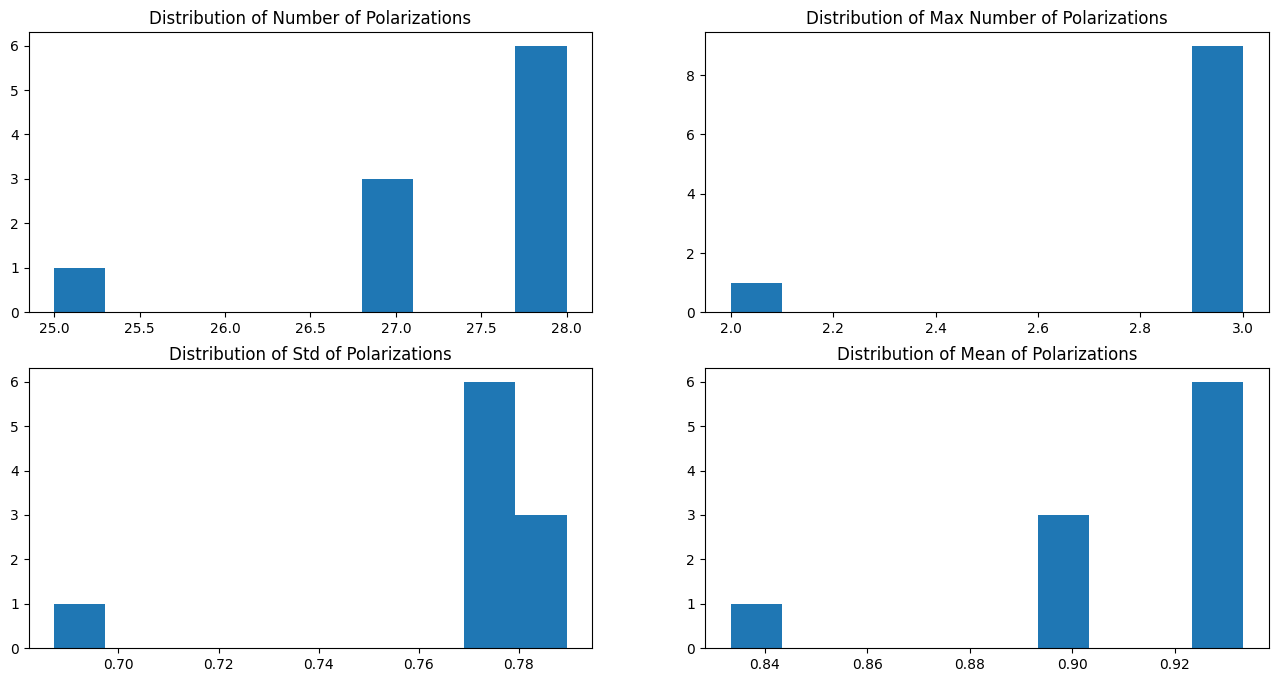

In [14]:
sum_polarized = [np.sum(r['Number of Polarized Nodes']) for r in results_ls]
max_polarized = [np.max(r['Number of Polarized Nodes']) for r in results_ls]
std_polarized = [np.std(r['Number of Polarized Nodes']) for r in results_ls]
mean_polarized = [np.mean(r['Number of Polarized Nodes']) for r in results_ls]

plt.figure(figsize=(16, 8))

plt.subplot(221)
plt.hist(sum_polarized)
plt.title('Distribution of Number of Polarizations');

plt.subplot(222)
plt.hist(max_polarized)
plt.title('Distribution of Max Number of Polarizations');

plt.subplot(223)
plt.hist(std_polarized)
plt.title('Distribution of Std of Polarizations');

plt.subplot(224)
plt.hist(mean_polarized)
plt.title('Distribution of Mean of Polarizations');

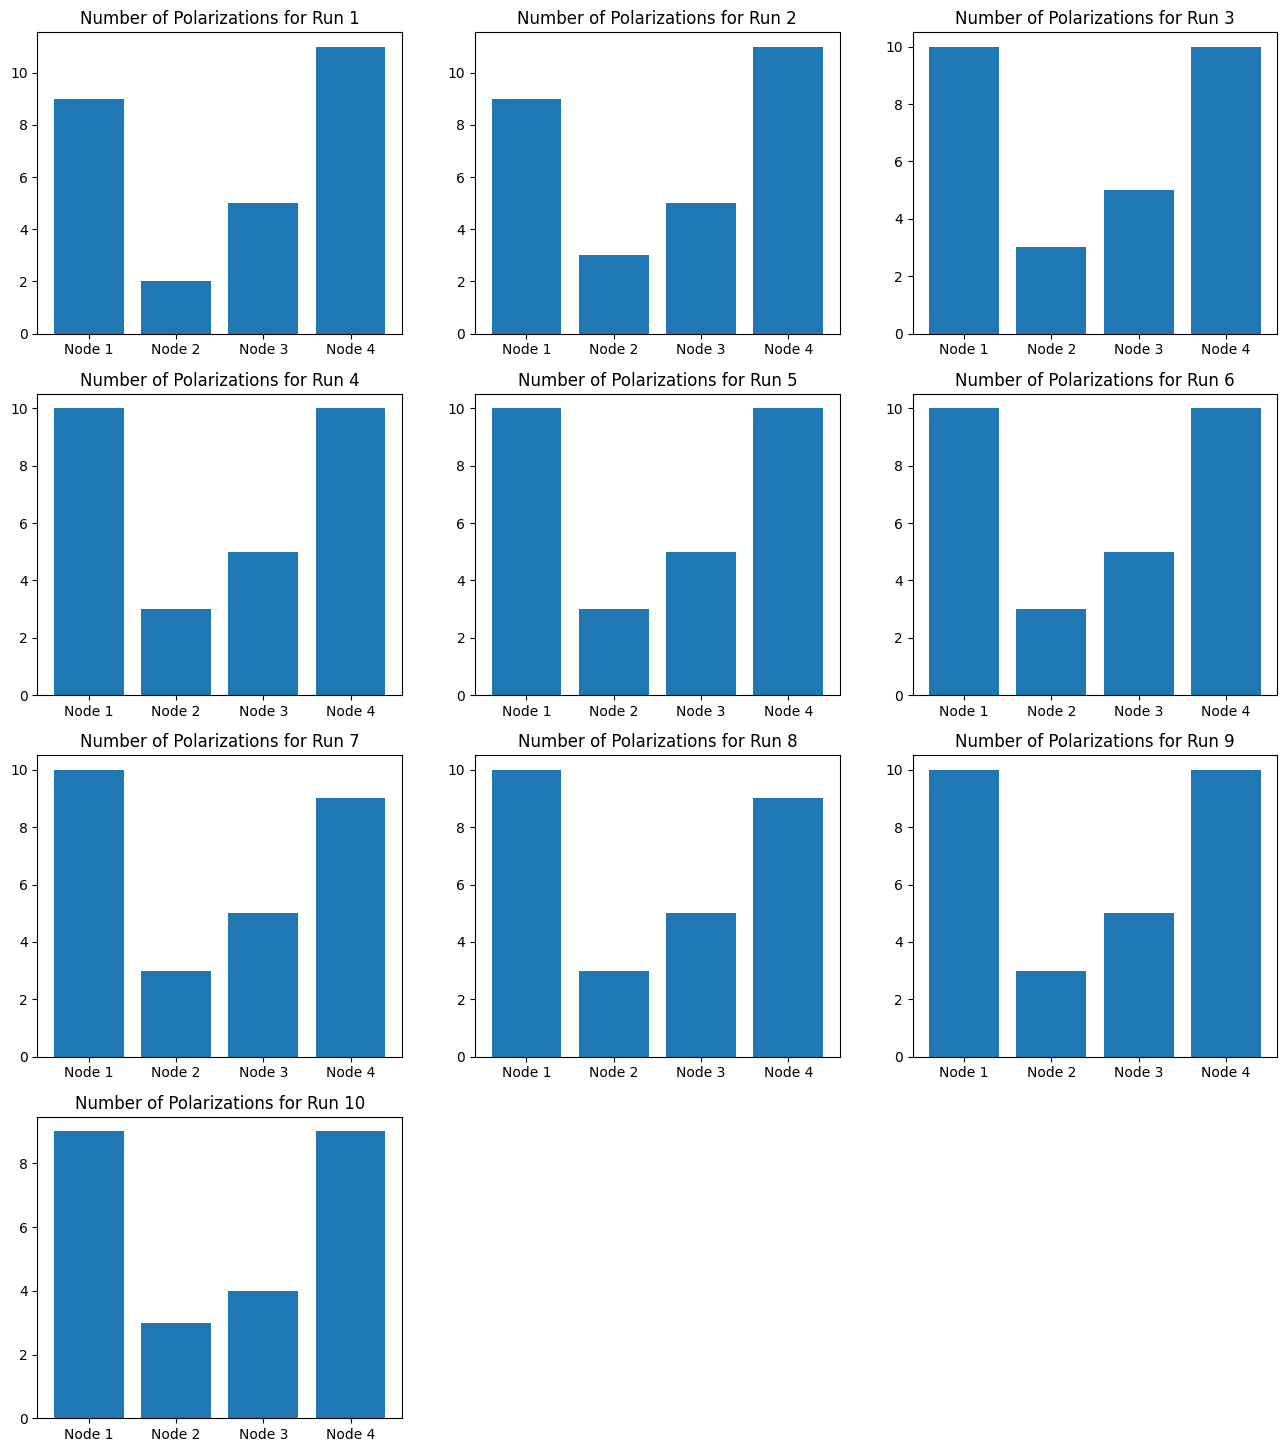

In [15]:
cat = ['Node 1', 'Node 2', 'Node 3', 'Node 4']
node_cols = [f'Node {i} is Polarized' for i in range(1, 5)]

plt.figure(figsize=(16, 6 * int(num_runs/3)))

for i in range(1, num_runs + 1):
    plt.subplot(int(num_runs/3) + 1, 3, i)
    plt.bar(cat, results_ls[i - 1][node_cols].sum().tolist())
    plt.title('Number of Polarizations for Run ' + str(i));
    if i > 30:
        continue

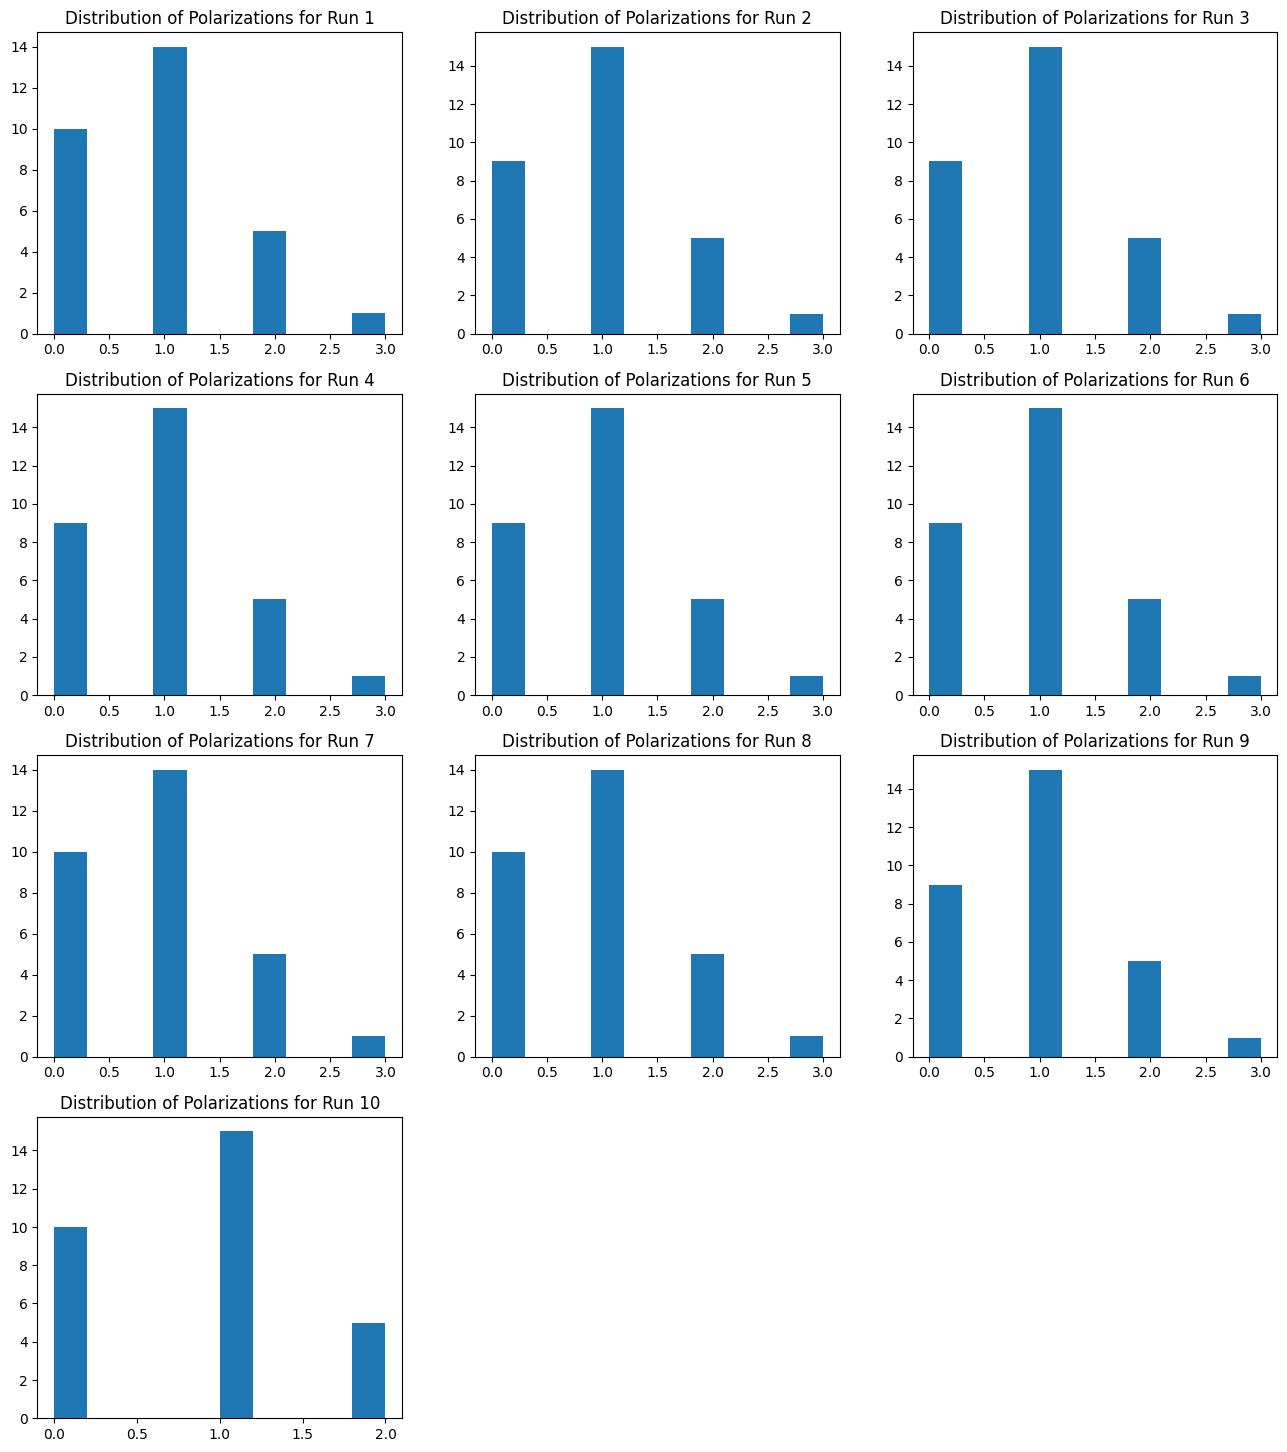

In [16]:
plt.figure(figsize=(16, 6 * int(num_runs/3)))

for i in range(1, num_runs + 1):
    plt.subplot(int(num_runs/3) + 1, 3, i)
    plt.hist(results_ls[i - 1]['Number of Polarized Nodes'])
    plt.title('Distribution of Polarizations for Run ' + str(i));
    if i > 30:
        continue